In [40]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Useful functions
def SaveFig(filename):
    plt.savefig(r'fig/'+filename)

In [88]:
# Call Option Valuation Using Black-Scholes
def BS_VCall(S,mu,sigma,K,T):
    d1 = (np.log(S/K) + (mu + 1/2 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C  = S * norm.cdf(d1) - K * norm.cdf(d2) * np.exp(-1 * mu * T)
    return round(C,4)

# Put Option Valuation Using Black-Scholes
def BS_VPut(S,mu,sigma,K,T):
    d1 = (np.log(S/K) + (mu + 1/2 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C  = K * norm.cdf(-1 * d2) * np.exp(-1 * mu * T) - S * norm.cdf(-1 * d1)
    return round(C,4)

# European Call Option Valuation Using BOPM
def BOPM_VCall(S,mu,sigma,K,T,N):
    dt = T/N
    u  = np.exp(sigma * np.sqrt(dt))
    d  = 1./u
    p  = (np.exp(mu * dt) - d) / (u - d)
    
    if(p <= 0 or p>=1):
        return -1
    
    # Call Option Value
    C = {}
    for m in range(0, N+1):
            C[(N, m)] = max(S * (u ** (m)) * (d ** (N-m)) - K, 0)
    for k in range(N-1, -1, -1):
        for m in range(0,k+1):
            C[(k, m)] = np.exp(-mu * dt) * (p * C[(k+1, m+1)] + (1-p) * C[(k+1, m)])
            
    return round(C[(0,0)],4)

# American Put Option Valuation Using BOPM
def BOPM_VPut(S,mu,sigma,K,T,N):
    dt = T/N
    u  = np.exp(sigma * np.sqrt(dt))
    d  = 1./u
    p  = (np.exp(mu * dt) - d) / (u - d)
    
    if(p <= 0 or p>=1):
        return -1
    
    # Put Option Binomial Value
    C = {}
    for m in range(0, N+1):
            C[(N, m)] = max(K - S * (u ** (m)) * (d ** (N-m)), 0)
    for k in range(N-1, -1, -1):
        for m in range(0,k+1):
            C[(k, m)] = np.exp(-mu * dt) * (p * C[(k+1, m+1)] + (1-p) * C[(k+1, m)])
            C[(k, m)] = max(C[(k, m)], K - S * (u ** (m)) * (d ** (k-m)))
            
    return round(C[(0,0)],4)

In [91]:
# European Call Option
S     = 42
mu    = 0.1
sigma = 0.2
K     = 40
T     = 0.5 # 6 months
N     = 1000

print('BOPM Call Value = ', BOPM_VCall(S,mu,sigma,K,T,N),'$')
print('BS Call Value   = ', BS_VCall(S,mu,sigma,K,T),'$')

BOPM Call Value =  4.7598 $
BS Call Value   =  4.7594 $


In [38]:
N_max = 1500
C = pd.DataFrame(columns=['Steps','Call_Value'])
for N in range(20,N_max+1,10):
    if(not N % 100) :
        print(N, end = '/')
    C = C.append({'Steps':N, 'Call_Value':BOPM_VCall(S,mu,sigma,K,T,N)}, ignore_index=True)

100/200/300/400/500/600/700/800/900/1000/1100/1200/1300/1400/1500/

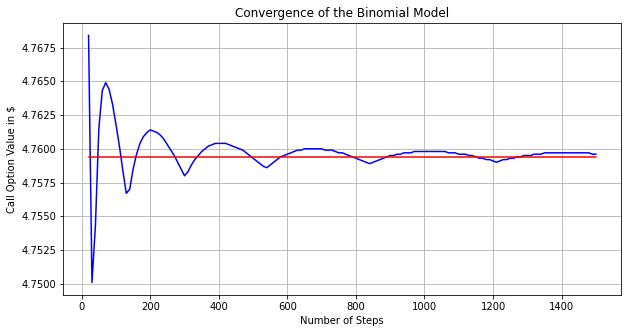

In [39]:
# Convergence Plot
plt.figure(figsize = (10, 5))
plt.plot(C['Steps'], C['Call_Value'], color='blue', label='Binomial Model')

y = 0 * C['Steps'] + BS_VCall(S,mu,sigma,K,T)
plt.plot(C['Steps'], y, color='red', label='Black-Scholes Model')

plt.xlabel('Number of Steps')
plt.ylabel('Call Option Value in $')
plt.title('Convergence of the Binomial Model')
plt.grid()
SaveFig('BOPM-BS-Convergence')
plt.show()

In [92]:
# American Put Option (Early Exercice)
S     = 50
mu    = 0.05
sigma = 0.2
K     = 52
T     = 2 # in years
N     = 1000

print('BOPM Put Value = ', BOPM_VPut(S,mu,sigma,K,T,N),'$')
print('BS Put Value   = ', BS_VPut(S,mu,sigma,K,T),'$')

BOPM Put Value =  4.8601 $
BS Put Value   =  4.1078 $
